# Анализ данных продуктового мобильного приложения


**Цели и задачи проекта:** проанализировать поведение пользователей, приобретающих продукты питания через мобильное приложение, и исследовать результаты A/A/B-эксперимента по влиянию изменения шрифта в приложении на действия пользователей.

**Входные данные:** записи в логе о действиях пользователей (событиях) 3-х экспериментальных групп во времени.

**Обозначения категорий исходных данных:** Исходные данные для проекта содержатся в файле формата csv. Обозначения переменных для исходного датасета logs_exp.csv приведены ниже:

* *EventName* — название события,
* *DeviceIDHash* — уникальный идентификатор пользователя,
* *EventTimestamp* — время события,
* *ExpId* — номер эксперимента: 246 (А, А1) и 247 (А, А2) — контрольные группы, а 248 (В) — экспериментальная группа.

**План работы** над проектом включает в себя выполнение следующих шагов:

* *Импорт данных и изучение общей информации.* На первом этапе исследуем общую информацию об имеющихся у нас в распоряжении данных, их типах, полноте и правильности представления. Предварительно оценим объем данных в исходном датасете, а также присутствие пропусков и дубликатов. Импортируем дополнительные библиотеки, необходимые для анализа и визуализации данных.

* *Подготовка данных.* В этой части работы обращаем пристальное внимание на недостатки исходных данных и их релевантность: анализируем пропуски, приводим названия колонок датасета к нижнему регистру и, при необходимости, переименовываем. Преобразуем данные о времени события в удобный формат, проверяем записи на присутствие ошибочных значений и обрабатываем дубликаты с целью исключения искажений в результатах.

* *Изучение и проверка данных.* Важный этап работы, связанный с изучением зафиксированных уникальных событий - их названий и временного интервала, в котором они происходили. Проверяется среднее число всех событий, связанных с пользователями, и полнота данных лога. Изучается процентное распределение пользователей по 3-м экспериментальным группам.

* *Изучение воронки событий.* В разделе уделяется внимание событиям, отраженным в логах, и частоте, с которой их совершали пользователи. Выделяются последовательные события. Рассматривается воронка событий, иллюстрирующая последовательное изменение числа совершенных действий пользователями.

* *Анализ результатов A/A/B-эксперимента.* Проводится анализ соответствия А/А/В-эксперимента условиям организации теста (проверяется соотношение числа пользователей в каждой экспериментальной группе и их уникальность). Оценивается разница в статистических критериях контрольных групп A1/A2 для проверки точности проведенного тестирования. Исследуется статистическая разница по доле пользовательских событий в контрольных и целевых группах.

* *Формулирование общего вывода*. На заключительном этапе приводится сумма выводов и рекомендаций по каждой части выполненного проекта. В общем выводе, на основе имеющихся данных и анализа, мы отразим степень влияния нового шрифта на поведенческие характеристики пользователей.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-изучение-общей-информации" data-toc-modified-id="Импорт-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение и проверка данных</a></span></li><li><span><a href="#Изучение-воронки-событий" data-toc-modified-id="Изучение-воронки-событий-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Изучение воронки событий</a></span></li><li><span><a href="#Анализ-результатов-A/A/B-эксперимента" data-toc-modified-id="Анализ-результатов-A/A/B-эксперимента-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ результатов A/A/B-эксперимента</a></span><ul class="toc-item"><li><span><a href="#Число-и-уникальность-пользователей-в-экспериментальных-группах" data-toc-modified-id="Число-и-уникальность-пользователей-в-экспериментальных-группах-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Число и уникальность пользователей в экспериментальных группах</a></span></li><li><span><a href="#Оценка-разницы-в-статистических-критериях-для-контрольных-групп-A/A" data-toc-modified-id="Оценка-разницы-в-статистических-критериях-для-контрольных-групп-A/A-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Оценка разницы в статистических критериях для контрольных групп A/A</a></span><ul class="toc-item"><li><span><a href="#Оценка-статистической-разницы-в-конверсии-для-контрольных-групп" data-toc-modified-id="Оценка-статистической-разницы-в-конверсии-для-контрольных-групп-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Оценка статистической разницы в конверсии для контрольных групп</a></span></li><li><span><a href="#Оценка-статистической-разницы-в-конверсии-для-контрольной-группы-А1-и-целевой-группы-В" data-toc-modified-id="Оценка-статистической-разницы-в-конверсии-для-контрольной-группы-А1-и-целевой-группы-В-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Оценка статистической разницы в конверсии для контрольной группы А1 и целевой группы В</a></span></li><li><span><a href="#Оценка-статистической-разницы-по-доле-пользовательских-событий-в-контрольных-группах" data-toc-modified-id="Оценка-статистической-разницы-по-доле-пользовательских-событий-в-контрольных-группах-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Оценка статистической разницы по доле пользовательских событий в контрольных группах</a></span></li></ul></li><li><span><a href="#Оценка-разницы-в-статистических-критериях-для-контрольных-и-целевой-групп" data-toc-modified-id="Оценка-разницы-в-статистических-критериях-для-контрольных-и-целевой-групп-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Оценка разницы в статистических критериях для контрольных и целевой групп</a></span><ul class="toc-item"><li><span><a href="#Оценка-статистической-разницы-по-доле-пользовательских-событий-между-A1/B-группами" data-toc-modified-id="Оценка-статистической-разницы-по-доле-пользовательских-событий-между-A1/B-группами-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Оценка статистической разницы по доле пользовательских событий между A1/B группами</a></span></li><li><span><a href="#Оценка-статистической-разницы-по-доле-пользовательских-событий-между-A2/B-группами" data-toc-modified-id="Оценка-статистической-разницы-по-доле-пользовательских-событий-между-A2/B-группами-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Оценка статистической разницы по доле пользовательских событий между A2/B группами</a></span></li><li><span><a href="#Оценка-статистической-разницы-по-доле-пользовательских-событий-между-(А1+A2)/B-группами" data-toc-modified-id="Оценка-статистической-разницы-по-доле-пользовательских-событий-между-(А1+A2)/B-группами-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Оценка статистической разницы по доле пользовательских событий между (А1+A2)/B группами</a></span></li></ul></li><li><span><a href="#Влияние-уровня-значимости-при-проверке-статистических-гипотез" data-toc-modified-id="Влияние-уровня-значимости-при-проверке-статистических-гипотез-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Влияние уровня значимости при проверке статистических гипотез</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

## Импорт данных и изучение общей информации

In [1]:
# установка обновлений пакетов Seaborn и Plotly для визуализации данных
!pip install seaborn==0.11.2 -q
!pip install plotly==5.1.0 -q

In [2]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st

# графические библиотеки
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# получение статичных изображений графиков plotly для отображения на GitHub
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
df = pd.read_csv('logs_exp.csv', sep='\t')

Получим предварительную информацию о имеющемся датасете:

In [5]:
def general_info(dataset):
    """
    Функция дает краткую информацию о размере датасета и типах данных, а также проверяет на присутствие полных дубликатов
    """
    # оформление комментариев при выводе данных
    class color:
       RED = '\033[91m'
       BOLD = '\033[1m'
       END = '\033[0m'
    
    # Вывод всех колонок датасета из запроса
    print('')
    print(color.RED + color.BOLD + 'Информация, включающая записи датасета:' + color.END)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', 130)
    display(dataset.head())
    
    # Вывод информации о размере датасета, типе данных и пропущенных значениях 
      
    print(color.RED + color.BOLD + 'Информация о размере датасета, типе данных и пропущенных значениях:' + color.END)
    print('')
    dataset.info()
          
    # Вывод информации о количестве дубликатов
    print('')
    duplicates_amount = dataset.duplicated().sum()
    duplicates_pct = duplicates_amount / len(dataset) * 100
    print(color.RED + color.BOLD + 'Количество полных дубликатов в данных:'+ color.END, duplicates_amount)
    print(color.RED + color.BOLD + '% полных дубликатов в данных:'+ color.END, duplicates_pct.round(2))

In [6]:
general_info(df)


Информация, включающая записи датасета:


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Информация о размере датасета, типе данных и пропущенных значениях:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB

Количество полных дубликатов в данных: 413
% полных дубликатов в данных: 0.17


**Промежуточные выводы**
* Данные файла-лога формата csv представлены в требуемой кодировке и не имеют нечитаемых символов;
* Исходный датасет содержит 244126 записей с информацией о поведении пользователей и их принадлежности к группам А/А/В теста;
* Большинство параметров датасета представлены верным типом данных. Исключением является формат времени зафиксированного события. Эта переменная приводится в виде целого числа, обозначающего Unix-время, и для детального анализа требует перевода в формат *datetime64*;
* Названия колонок датасета требуется привести к нижнему регистру и переименовать в более удобные для восприятия названия;
* Датасет не содержит пропуски, но включает 413 дубликатов.

## Подготовка данных

Удалим из датасета строки-дубликаты и переименуем названия колонок датасета:

In [7]:
df = df.drop_duplicates()

In [8]:
df = df.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'event_timestamp',
    'ExpId':'group'
})

Изменим исходную форму представления (unix timestamp) и тип данных столбца *event_timestamp* - времени, когда зафиксировано событие - и выделим отдельно столбец с датой:

In [9]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

In [10]:
df['month'] = df['event_timestamp'].dt.date
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')

Присвоим группам 246 и 247 флаг А, а группе 248 - флаг В, для удобства последующего объединения контрольных групп:

In [11]:
df.loc[df['group'] == 246, 'group_name'] = 'A'
df.loc[df['group'] == 247, 'group_name'] = 'A'
df.loc[df['group'] == 248, 'group_name'] = 'B'

In [12]:
df.head()

,event_name,user_id,event_timestamp,group,month,group_name
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,A
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,A
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,B
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,B
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,B


**Промежуточные выводы**
* Строки-дубликаты были исключены из датасета;
* Названия колонок датасета приведены к дружественной для анализа форме;
* Формат Unix-времени преобразован в формат *datetime64*.

## Изучение и проверка данных

(1) Определим из данных лога число уникальных событий и выведем их названия:

In [13]:
print('Число уникальных событий:', df['event_name'].nunique())
events = df['event_name'].unique().tolist()
print(events)

Число уникальных событий: 5
['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear', 'OffersScreenAppear', 'Tutorial']


(2) Выведем число уникальных пользователей, представленных в логе:

In [14]:
n_unique_users = df['user_id'].nunique()
n_unique_users

7551

(3) Определим среднее число всех событий, связанных с пользователями, а также среднее число уникальных событий (события округлены до ближайшего целого числа):

In [15]:
n_events = (
    df.groupby('user_id')
      .agg({'event_name': ['count', 'nunique']})
      .droplevel(0, axis=1)
      .reset_index()
      .rename(columns={'count':'all_events', 'nunique':'unique_events'})
)

print('Среднее число событий, которое приходится на пользователя:', np.ceil(n_events['all_events'].mean()))
print('Среднее число уникальных событий, которое приходится на пользователя:', np.ceil(n_events['unique_events'].mean()))

Среднее число событий, которое приходится на пользователя: 33.0
Среднее число уникальных событий, которое приходится на пользователя: 3.0


(4) Определим интервал дат, который доступен для проведения анализа данных и проанализируем полноту данных:

In [16]:
print('Начальная дата:', df['month'].min())
print('Конечная дата:', df['month'].max())

Начальная дата: 2019-07-25 00:00:00
Конечная дата: 2019-08-07 00:00:00


Построим гистограмму распределения событий по дате и времени:

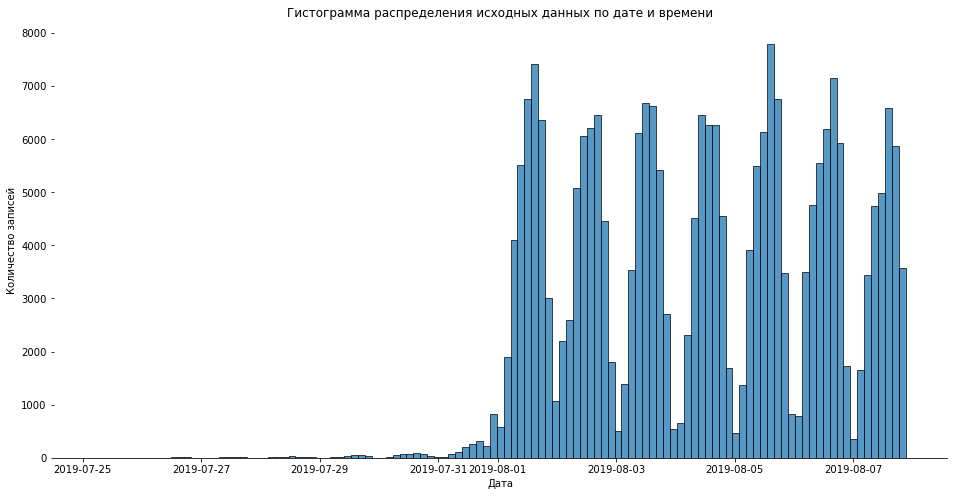

In [17]:
plt.figure(figsize=(16, 8))
g = sns.histplot(data = df, x='event_timestamp')
g.set_title('Гистограмма распределения исходных данных по дате и времени')
g.set_ylabel('Количество записей')
g.set_xlabel('Дата')
sns.despine(left=True, bottom=False, right=True)
plt.show()

Из гистограммы видно, что имеющиеся данные за весь период с 25 июля по 7 августа 2019 г. нельзя считать одинаково полными. "Перекос", наблюдаемый в логах, требуется устранить путём исключения неполных старых данных. Началом периода, где данные представлены в полном объеме, примем 1 августа 2019 г, его окончанием - 7 августа 2019 г.

Сформируем обновлённый датасет в интересующем нас интервале дат:

In [18]:
full_records = df.loc[(df['month'] >= '2019-08-01')] 

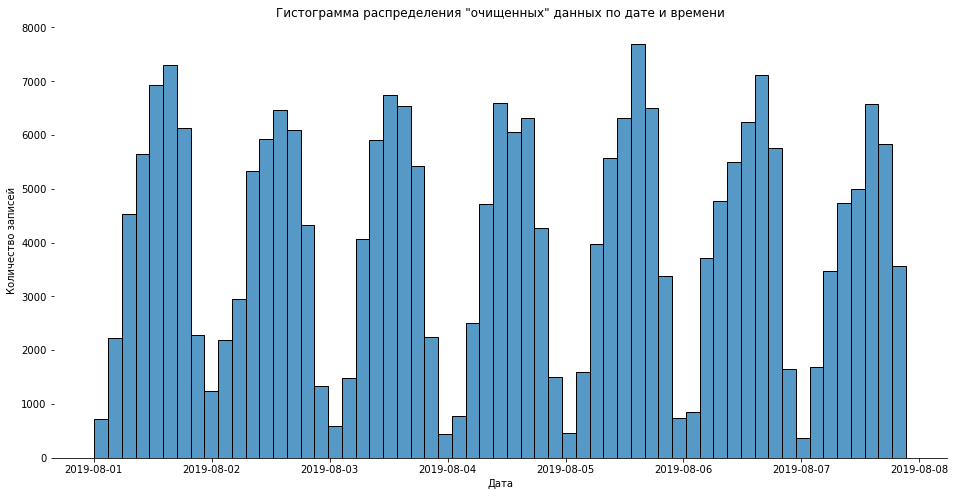

In [19]:
plt.figure(figsize=(16, 8))
g = sns.histplot(data = full_records, x='event_timestamp')
g.set_title('Гистограмма распределения "очищенных" данных по дате и времени')
g.set_ylabel('Количество записей')
g.set_xlabel('Дата')
sns.despine(left=True, bottom=False, right=True)
plt.show()

(5) Определим, какое количество событий и пользователей были выведены из данных для анализа, после исключения старых данных:

In [20]:
n_excluded_users = df['user_id'].nunique() - full_records['user_id'].nunique()
pct_excluded_users = n_excluded_users / df['user_id'].nunique()
print('Число и % исключённых из анализа:')
print('- пользователей:', n_excluded_users, '({:.1%})'.format(pct_excluded_users))

n_excluded_events = df['event_name'].count() - full_records['event_name'].count()
pct_excluded_events = n_excluded_events / df['event_name'].count()
print('- событий:', n_excluded_events, '({:.1%})'.format(pct_excluded_events))

Число и % исключённых из анализа:
- пользователей: 17 (0.2%)
- событий: 2826 (1.2%)


Незначительная доля исключённых из датасета числа пользователей и совершенных ими событий позволяет продолжить дальнейший анализ данных.

(6) Проверим в каком соотношении представлены пользователи 3-х исследуемых экспериментальных групп:

In [21]:
groups_representation = full_records.groupby('group').agg({'user_id':'nunique'}).reset_index()
groups_representation['pct'] = ((groups_representation['user_id'] / groups_representation['user_id'].sum()).round(4))*100
groups_representation = groups_representation.rename(columns={'user_id':'n_users'})
groups_representation

,group,n_users,pct
0,246,2484,32.97
1,247,2513,33.36
2,248,2537,33.67


Три экспериментальные группы представлены практически в равных пропорциях.

**Промежуточные выводы**
* Число уникальных событий по данным лога равно 5;
* Определен интервал дат для анализа данных с учётом их полноты: 1-7 августа 2019 г.;
* Среднее число событий, которое приходится на пользователя в анализируемом временном интервале: 33. Среднее число уникальных событий, которое приходится на пользователя: 3;
* Пользователи 3-х экспериментальных групп представлены в практически равных пропорциях (гр.246 - 2484 пользователя (32.97%), гр.247 - 2513 (33.36%), гр.248 - 2537 (33.67%).

## Изучение воронки событий

Посмотрим, какие события есть в логах, и как часто они встречаются. Отсортируем события по частоте.

In [22]:
events = (
    full_records.groupby('event_name')
                .agg({'event_timestamp':'count'})
                .rename(columns={'event_timestamp':'total_events'})
                .sort_values(by='total_events', ascending=False)
                .reset_index()
)

events['pct'] = ((events['total_events'] / events['total_events'].sum()).round(4))*100

events

,event_name,total_events,pct
0,MainScreenAppear,117328,48.71
1,OffersScreenAppear,46333,19.23
2,CartScreenAppear,42303,17.56
3,PaymentScreenSuccessful,33918,14.08
4,Tutorial,1005,0.42


Посчитаем, сколько пользователей совершали каждое из этих событий:

In [23]:
events_and_users = (
    full_records.groupby('event_name')
                .agg({'user_id':'nunique'})
                .rename(columns={'user_id':'total_users'})
                .sort_values(by='total_users', ascending=False)
                .reset_index()
)

n_total_users = n_unique_users - n_excluded_users
events_and_users['pct_users'] = ((events_and_users['total_users'] / n_total_users)*100).round(2)

events_and_users

,event_name,total_users,pct_users
0,MainScreenAppear,7419,98.47
1,OffersScreenAppear,4593,60.96
2,CartScreenAppear,3734,49.56
3,PaymentScreenSuccessful,3539,46.97
4,Tutorial,840,11.15


Из полученных данных видно, что часть событий выстраиваются в последовательную цепочку, а часть из них независимы. Появление главного экрана приложения *MainScreenAppear* - событие, которое в большинстве случаев (98.47%) открывает последовательную цепочку событий. В менее 2% случаев, этого не происходит, вероятно из-за возможности использования сторонних сервисов для перехода на экран с предложениями товаров, либо из-за неполноты данных в логах. Вторым последовательным событием является открытие экрана с предложениями товаров *OffersScreenAppear*. Этой стадии достигает более 60% от первоначального числа пользователей. Следующей стадией является возможность оплатить выбранные товары *CartScreenAppear*, до этого этапа доходят около 50% пользователей. Заключительным этапам в последовательности событий является появление уведомления, подтверждающего успешно проведенную оплату *PaymentScreenSuccessful*. Из данных видно, что практически 47% процентов пользователей от первоначального их числа совершили и оплатили покупку. При этом 195 человек, которые уже добавили товар в "корзину" и увидели экран с деталями оплаты, так и не завершили (или завершили неудачно) стадию оплаты. В приложении, имеется независимое от других событие (за исключением, видимо, появления главной страницы), связанное с использованием руководства по использованию приложения. Этой опцией за исследуемый период воспользовались около 11% пользователей.

Для расчета воронки событий будем использовать следующую последовательность: 

**событие A:** открытие приложения --> **событие B:** выбор товара --> **событие C:** оплата заказа --> **событие D:** подтверждение успешной оплаты.

Посчитаем по воронке событий, какая доля пользователей (от числа пользователей на предыдущем шаге) переходит на следующее последовательное событие:

In [24]:
events_funnel = events_and_users.loc[events_and_users['event_name'] !="Tutorial"].copy(deep=True)

In [25]:
events_funnel['ratio_from_previous_event'] = events_funnel['total_users'].div(events_funnel['total_users']
                                                                              .shift(1)).fillna(1).round(3)

events_funnel

,event_name,total_users,pct_users,ratio_from_previous_event
0,MainScreenAppear,7419,98.47,1.000
1,OffersScreenAppear,4593,60.96,0.619
2,CartScreenAppear,3734,49.56,0.813
3,PaymentScreenSuccessful,3539,46.97,0.948


Построим диаграмму, которая отобразит результаты вычислений (в % указана доля пользователей от предыдущего события):

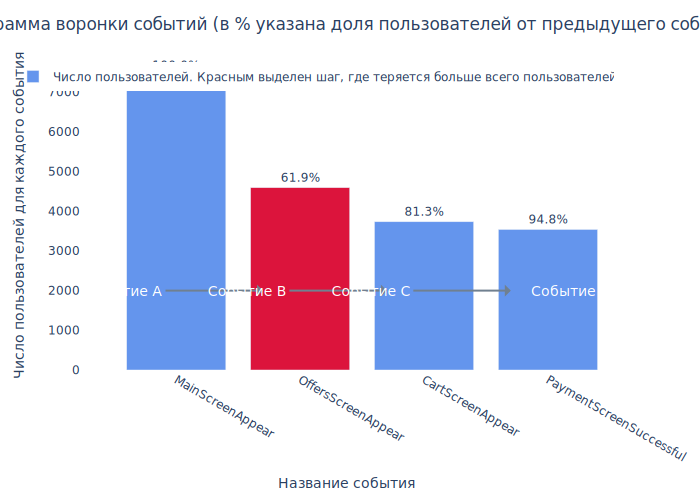

In [26]:
colors = ['cornflowerblue'] * 4
colors[1] = 'crimson'

fig = px.bar(events_funnel, y='total_users', x='event_name',
             text='ratio_from_previous_event',
             hover_data={'event_name':False},
             labels={'total_users': 'Число пользователей',
                     'ratio_from_previous_event':'доля пользователей от предшествующего события'})

fig.update_traces(texttemplate='%{text:.1%}', 
                  textposition='outside', 
                  marker_color=colors, 
                  showlegend=True, 
                  name='Число пользователей. Красным выделен шаг, где теряется больше всего пользователей')


fig.update_layout(title='Диаграмма воронки событий (в % указана доля пользователей от предыдущего события)',
                  xaxis_title='Название события',
                  yaxis_title='Число пользователей для каждого события',
                  uniformtext_minsize=8,
                  uniformtext_mode='hide',
                  plot_bgcolor='#ffffff',
                  legend=dict(
                      orientation='h',
                      yanchor='bottom',
                      y=0.9,
                      xanchor='right',
                      x=1),
                  annotations=[dict(
                      x='0.7',
                      y='2000',
                      text='Событие А ',
                      textangle=0,
                      ax=-140,
                      ay=0,
                      font=dict(
                          color='white',
                          size=14),
                      arrowcolor='slategray',
                      arrowsize=1,
                      arrowwidth=2,
                      arrowhead=1),
                  dict(
                      x='1.7',
                      y='2000',
                      text='Событие B ',
                      textangle=0,
                      ax=-140,
                      ay=0,
                      font=dict(
                          color='white',
                          size=14),
                      arrowcolor='slategray',
                      arrowsize=1,
                      arrowwidth=2,
                      arrowhead=1),
                  dict(
                      x='2.7',
                      y='2000',
                      text='Событие C ',
                      textangle=0,
                      ax=-140,
                      ay=0,
                      font=dict(
                          color='white',
                          size=14),
                      arrowcolor='slategray',
                      arrowsize=1,
                      arrowwidth=2,
                      arrowhead=1),
                  dict(
                      showarrow=False,
                      x='2.75',
                      y='2000',
                      text='Событие D ',
                      xanchor='left',
                      xshift=10,
                      font=dict(
                          color='white',
                          size=14))
                      ]
                  
                 )

fig.update(layout=dict(title=dict(x=0.5)))

fig.show()

В дополнение к столбчатой диаграмме представим данные в форме воронки, где укажем как численно и в % изменялось количество пользователей на каждом событии:

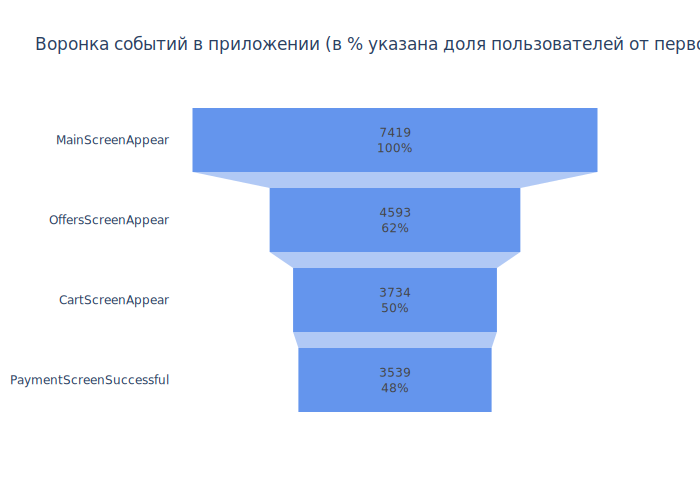

In [27]:
fig = go.Figure(go.Funnel(
    y = events_funnel['event_name'],
    x = events_funnel['total_users'],
    textinfo = 'value+percent initial',
    hoverinfo='percent previous+percent initial',
    marker = {'color': 'cornflowerblue'}
    ))

fig.update_layout(title='Воронка событий в приложении (в % указана доля пользователей от первого события)',
                  plot_bgcolor='#ffffff')
fig.show()

Из таблицы и диаграмм видно, что наибольшая потеря пользователей происходит в самом начале использования приложения - в момент перехода на страницу с предложениями товара. Это событие совершают лишь около 62% пользователей, от тех, кто открыл главную страницу приложения. В дальнейшем, около пятой части пользователей не добавляют товар для совершения оплаты, и у почти 5% из них оплата не признаётся успешной.

Доля пользователей, которая успешно проводит оплату составляет около 48% от числа тех, кто совершил первое действие и около 47% от общего числа пользователей приложения:

In [28]:
print('Доля пользователей, которая доходит от первого события до успешной оплаты составляет, %:',
      round(events_funnel['total_users'].loc[3] / events_funnel['total_users'].loc[0]*100, 1))

Доля пользователей, которая доходит от первого события до успешной оплаты составляет, %: 47.7


**Промежуточные выводы**
* Из 5 уникальных событий приложения 4 события выстраиваются в последовательную цепочку, формируя воронку: событие A: открытие приложения --> событие B: выбор товара --> событие C: оплата заказа --> событие D: подтверждение успешной оплаты.
* Наибольшая потеря пользователей происходит на этапе перехода на страницу с предложениями товара. Это событие совершают около 62% пользователей, которые открыли главную страницу приложения. В дальнейшем, пятая часть из них не добавляют товар для совершения оплаты, а у почти 5% тех, кто оформил товар, оплата не совершается.
* Пятое событие является независимым от других событий (за исключением появления главной страницы) и связано с использованием руководства пользователя.
* Доля пользователей, которая получила подтверждение об оплате, составляет около 48% от числа тех, кто совершил первое действие, открыв приложение на главной странице.

## Анализ результатов A/A/B-эксперимента

A/B тестирование является одним из самых мощных инструментов проверки действенности предложенных идей на практике с относительно небольшими затратами и потерями в случае неудавшегося эксперимента. Последующие пункты дают представление о том, как можно анализировать получаемые данные в ходе проведения A/A/B теста, с учётом первоначальной проверки контрольных групп на соответствие условиям организации эксперимента.

### Число и уникальность пользователей в экспериментальных группах

Выведем число пользователей в каждой экспериментальной группе:

In [29]:
groups_representation = groups_representation.assign(group_name=pd.Series(['A1', 'A2', 'B']).values)
groups_representation

,group,n_users,pct,group_name
0,246,2484,32.97,A1
1,247,2513,33.36,A2
2,248,2537,33.67,B


Различие числа пользователей для двух контрольных групп составляет в пределах 1%, разница между контрольными группами и целевой группой также равна около 1%.

In [30]:
groups_representation['n_users'].pct_change()

0         NaN
1    0.011675
2    0.009550
Name: n_users, dtype: float64

Проверим пользователей приложения на их принадлежность только к одной экспериментальной группе (246-A1, 247-A2 или B):

In [31]:
users_check = full_records.groupby('user_id').agg({'group':'nunique'}).query('group > 1').reset_index()
if len(users_check) == 0:
    print('Пользователи в каждой экспериментальной группе уникальны')
else:
    print('Есть уникальные пользователи, которые принадлежат нескольким группам')

Пользователи в каждой экспериментальной группе уникальны


### Оценка разницы в статистических критериях для контрольных групп A/A

#### Оценка статистической разницы в конверсии для контрольных групп

В качестве критерия для сравнения поведения контрольных групп используем конверсию для каждой из них:

In [32]:
events_and_users_group246 = (
    full_records.query('(event_name !="Tutorial") & (group == 246)')
                .groupby('event_name')
                .agg({'user_id':'nunique'})
                .rename(columns={'user_id':'n_users_246'})
                .sort_values(by='n_users_246', ascending=False)
                .reset_index()
)

events_and_users_group246

,event_name,n_users_246
0,MainScreenAppear,2450
1,OffersScreenAppear,1542
2,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200


Определим конверсию пользователей приложения в покупателей для контрольной группы 246, с учетом того, что число пользователей приложения для каждой группы представлено в таблице *groups_representation*:

In [33]:
p1 = events_and_users_group246['n_users_246'].loc[3] / groups_representation['n_users'].loc[0]
print(p1.round(4))

0.4831


Аналогичные вычисления проведём для второй контрольной группы пользователей:

In [34]:
events_and_users_group247 = (
    full_records.query('(event_name !="Tutorial") & (group == 247)')
                .groupby('event_name')
                .agg({'user_id':'nunique'})
                .rename(columns={'user_id':'n_users_247'})
                .sort_values(by='n_users_247', ascending=False)
                .reset_index()
)

events_and_users_group247

,event_name,n_users_247
0,MainScreenAppear,2476
1,OffersScreenAppear,1520
2,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158


Определим конверсию пользователей приложения в покупателей для контрольной группы 247:

In [35]:
p2 = events_and_users_group247['n_users_247'].loc[3] / groups_representation['n_users'].loc[1]
print(p2.round(4))

0.4608


Оценим конверсию в комбинированном датасете для двух контрольных групп:

In [36]:
p_combined = ((events_and_users_group246['n_users_246'].loc[3] + events_and_users_group247['n_users_247'].loc[3]) / 
               (groups_representation['n_users'].loc[0] + groups_representation['n_users'].loc[1])
              )
p_combined.round(4)

0.4719

Определим разницу в значениях конверсий в датасетах контрольных групп:

In [37]:
difference = p1 - p2
difference.round(4)

0.0223

Проверим гипотезу о равенстве долей (конверсий). 

В качестве **нулевой гипотезы H0** примем, что конверсия контрольной группы 246 равна конверсии контрольной группы 247. 

**Альтернативной гипотезой H1** будет следующая: конверсия контрольной группы 246 не равна конверсии контрольной группы 247. 

Посчитаем статистику в стандартных отклонениях стандартного нормального распределения:

In [38]:
z_value = (
    difference / mth.sqrt(p_combined * (1 - p_combined) * 
                    (1/groups_representation['n_users'].loc[0] + 1/groups_representation['n_users'].loc[1]))
                         )
z_value.round(4)

1.578

Зададим стандартное нормальное распределение (среднее 0, стандартное отклонение 1)

In [39]:
distr = st.norm(0, 1)

Определим уровень значимости для этой статистики — p-value, который будет сравниваться с выбранным уровнем значимости alpha, и в зависимости от его значения нулевая гипотеза (гипотеза о равенстве) будет либо отвергаться (p-value < alpha), либо нет (p-value > alpha). Зададим критический уровень статистической значимости alpha = 0.05. Тест в данном случае - двусторонний, что исключает направленность.

In [40]:
alpha = 0.05
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-value=', p_value.round(4))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-value= 0.1146
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Результаты проверки показали, что конверсия контрольной группы 246 равна конверсии контрольной группы 247 при уровне статистической значимости alpha = 0.05. Соответственно, контрольные группы сформированы верно.

#### Оценка статистической разницы в конверсии для контрольной группы А1 и целевой группы В

На примере первой контрольной группы (246) и целевой группы (248) оценим статистическую разницу в конверсиях в результате внедрения нового шрифта. Сформируем сводную таблицу с числом событий, совершенных пользователями целевой группы:

In [41]:
events_and_users_group248 = (
    full_records.query('(event_name !="Tutorial") & (group == 248)')
                .groupby('event_name')
                .agg({'user_id':'nunique'})
                .rename(columns={'user_id':'n_users_248'})
                .sort_values(by='n_users_248', ascending=False)
                .reset_index()
)

events_and_users_group248

,event_name,n_users_248
0,MainScreenAppear,2493
1,OffersScreenAppear,1531
2,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181


Определим конверсию пользователей приложения в покупателей для контрольной группы 246:

In [42]:
p1 = events_and_users_group246['n_users_246'].loc[3] / groups_representation['n_users'].loc[0]
print(p1.round(4))

0.4831


Определим конверсию пользователей приложения в покупателей для целевой группы 248:

In [43]:
p2 = events_and_users_group248['n_users_248'].loc[3] / groups_representation['n_users'].loc[2]
print(p2.round(4))

0.4655


Оценим конверсию в комбинированном датасете для двух групп:

In [44]:
p_combined = ((events_and_users_group246['n_users_246'].loc[3] + events_and_users_group248['n_users_248'].loc[3]) / 
               (groups_representation['n_users'].loc[0] + groups_representation['n_users'].loc[2])
              )
p_combined.round(4)

0.4742

In [45]:
difference = p1 - p2

Посчитаем статистику в стандартных отклонениях стандартного нормального распределения:

In [46]:
z_value = (
    difference / mth.sqrt(p_combined * (1 - p_combined) * 
                    (1/groups_representation['n_users'].loc[0] + 1/groups_representation['n_users'].loc[2]))
                         )
z_value.round(4)

1.2474

Определим уровень значимости для этой статистики — p-value. 

Сформулируем **нулевую гипотезу H0**: конверсия контрольной группы 246 равна конверсии целевой группы 248. 

**Альтернативной гипотезой H1** будет следующая: конверсия контрольной группы 246 не равна конверсии целевой группы 248. 

In [47]:
alpha = 0.05
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-value=', p_value.round(4))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-value= 0.2123
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Вывод к которому мы пришли: конверсия контрольной группы 246 равна конверсии целевой группы 248 при уровне статистической значимости alpha = 0.05.

#### Оценка статистической разницы по доле пользовательских событий в контрольных группах

Определим число и долю пользователей из контрольных групп, совершивших определённое событие в приложении:

In [48]:
events_and_users_group246['pct_users_246'] = events_and_users_group246['n_users_246'] / groups_representation['n_users'].loc[0]
events_and_users_group246

,event_name,n_users_246,pct_users_246
0,MainScreenAppear,2450,0.986312
1,OffersScreenAppear,1542,0.620773
2,CartScreenAppear,1266,0.509662
3,PaymentScreenSuccessful,1200,0.483092


In [49]:
events_and_users_group247['pct_users_247'] = events_and_users_group247['n_users_247'] / groups_representation['n_users'].loc[1]
events_and_users_group247

,event_name,n_users_247,pct_users_247
0,MainScreenAppear,2476,0.985277
1,OffersScreenAppear,1520,0.604855
2,CartScreenAppear,1238,0.492638
3,PaymentScreenSuccessful,1158,0.460804


Проверим с использованием универсальной функции, будет ли отличие между контрольными группами статистически достоверным по числу пользователей, совершивших определенное событие:

In [50]:
# исключение события, связанного с использованием руководства пользователя Tutorial
filtered_events = events_and_users['event_name'].unique().tolist()
filtered_events.remove("Tutorial")
filtered_events

['MainScreenAppear',
 'OffersScreenAppear',
 'CartScreenAppear',
 'PaymentScreenSuccessful']

In [51]:
# формирование датасета событий без события Tutorial
full_records_without_tutorial = full_records.query('event_name !="Tutorial"')
full_records_without_tutorial.head()

,event_name,user_id,event_timestamp,group,month,group_name
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,A
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,A
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,A
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,A
2833,MainScreenAppear,4899590676214355127,2019-08-01 00:10:15,247,2019-08-01,A


Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, используем метод Шидака для корректировки уровня значимости. Для этого зададим начальный критический уровень статистической значимости alpha = 0.05 и скорректируем его для общего числа сравнений, планируемых в данной работе (16): 4 гипотезы, проверяемые на 4-х экспериментальных взаимодействиях (А1/А2, A1/B, A2/B, A1+A2/B).

In [52]:
def stat_confidence(x, y, data):

    print(data.loc[[x, y]])
    successes = data
    trials = groups_representation['n_users']
    
    # доля успешных действий для первой сравниваемой группы
    p1 = successes[x] / trials[x]

    # доля успешных действий для второй сравниваемой группы
    p2 = successes[y] / trials[y]
    
    # доля успехов в комбинированном датасете:
    p_combined = (successes[x] + successes[y]) / (trials[x] + trials[y])

    # разница пропорций в датасетах
    difference = p1 - p2
    
    # считаем статистику в стандартных отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[x] + 1/trials[y]))
    
    # задаём стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    # задаём критический уровень статистической значимости
    alpha = 0.05
    
    # вносим поправку в критический уровень статистической значимости, используя метод Шидака
    alpha_shidaka = 1 - (1 - alpha)**(1/16)
    
    print('Скорректированный уровень значимости: ', round(alpha_shidaka, 3))
    
    p_value = ((1 - distr.cdf(abs(z_value))) * 2).round(3)

    print('p-значение: ', p_value)

    if p_value < alpha_shidaka:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

In [53]:
print('Нулевая гипотеза H0: доля событий в контрольной группе 246 равна доле событий в контрольной группе 247')
print()
for name in filtered_events:
    data = (full_records_without_tutorial
        .query('event_name == @name')
        .groupby('group')
        .agg({'user_id':'nunique'})
        .reset_index())['user_id']
        
    print('Событие:', name)
    stat_confidence(0, 1, data)
    print()

Нулевая гипотеза H0: доля событий в контрольной группе 246 равна доле событий в контрольной группе 247

Событие: MainScreenAppear
0    2450
1    2476
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.757
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
0    1542
1    1520
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.248
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
0    1266
1    1238
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.229
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
0    1200
1    1158
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.115
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Нулевая гипотеза о равенстве долей событий не была опровергнута для всех событий в контрольных группах при скорректированном уровне статистической значимости alpha = 0.003.

### Оценка разницы в статистических критериях для контрольных и целевой групп

Определим число и долю пользователей из целевой группы, совершивших определённое событие в приложении:

In [54]:
events_and_users_group248 = (
    full_records.query('(event_name !="Tutorial") & (group == 248)')
                .groupby('event_name')
                .agg({'user_id':'nunique'})
                .rename(columns={'user_id':'n_users_248'})
                .sort_values(by='n_users_248', ascending=False)
                .reset_index()
)

events_and_users_group248['pct_users_248'] = events_and_users_group248['n_users_248'] / groups_representation['n_users'].loc[2]
events_and_users_group248

,event_name,n_users_248,pct_users_248
0,MainScreenAppear,2493,0.982657
1,OffersScreenAppear,1531,0.603469
2,CartScreenAppear,1230,0.484825
3,PaymentScreenSuccessful,1181,0.465510


#### Оценка статистической разницы по доле пользовательских событий между A1/B группами

In [55]:
print('Нулевая гипотеза H0: доля событий в контрольной группе 246 равна доле событий в целевой группе 248')
print()
for name in filtered_events:
    data = (full_records_without_tutorial
        .query('event_name == @name')
        .groupby('group')
        .agg({'user_id':'nunique'})
        .reset_index())['user_id']
        
    print('Событие:', name)
    stat_confidence(0, 2, data)
    print()

Нулевая гипотеза H0: доля событий в контрольной группе 246 равна доле событий в целевой группе 248

Событие: MainScreenAppear
0    2450
2    2493
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.295
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
0    1542
2    1531
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.208
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
0    1266
2    1230
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.078
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
0    1200
2    1181
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.212
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Нулевая гипотеза о равенстве долей событий между первой контрольной и целевой группой не была опровергнута для всех событий в первой контрольной и целевой группах при скорректированном уровне статистической значимости alpha = 0.003.

#### Оценка статистической разницы по доле пользовательских событий между A2/B группами

In [56]:
print('Нулевая гипотеза H0: доля событий в контрольной группе 247 равна доле событий в целевой группе 248')
print()
for name in filtered_events:
    data = (full_records_without_tutorial
        .query('event_name == @name')
        .groupby('group')
        .agg({'user_id':'nunique'})
        .reset_index())['user_id']
    
    print('Событие:', name)
    stat_confidence(1, 2, data)
    print()

Нулевая гипотеза H0: доля событий в контрольной группе 247 равна доле событий в целевой группе 248

Событие: MainScreenAppear
1    2476
2    2493
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.459
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
1    1520
2    1531
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.92
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
1    1238
2    1230
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.579
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
1    1158
2    1181
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.737
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Нулевая гипотеза о равенстве долей событий между второй контрольной и целевой группой не была опровергнута при скорректированном уровне статистической значимости alpha = 0.003.

#### Оценка статистической разницы по доле пользовательских событий между (А1+A2)/B группами

Используем объединённую контрольную группу и определим число пользователей:

In [57]:
groups_representation = (
    full_records_without_tutorial.groupby('group_name')
                                                     .agg({'user_id':'nunique'})
                                                     .rename(columns={'user_id':'n_users'})
                                                     .reset_index()
)

groups_representation

,group_name,n_users
0,A,4995
1,B,2535


Проведём оценку статистической разницы по доле пользовательских событий между объединённой контрольной группой и целевой группой:

In [58]:
print('Нулевая гипотеза H0: доля событий в объединённой контрольной группе равна доле событий в целевой группе')
print()
for name in filtered_events:
    data = (full_records_without_tutorial
        .query('event_name == @name')
        .groupby('group_name')
        .agg({'user_id':'nunique'})
        .reset_index())['user_id']
        
    print('Событие:', name)
    stat_confidence(0, 1, data)
    print()

Нулевая гипотеза H0: доля событий в объединённой контрольной группе равна доле событий в целевой группе

Событие: MainScreenAppear
0    4926
1    2493
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.349
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: OffersScreenAppear
0    3062
1    1531
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.446
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: CartScreenAppear
0    2504
1    1230
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.187
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: PaymentScreenSuccessful
0    2358
1    1181
Name: user_id, dtype: int64
Скорректированный уровень значимости:  0.003
p-значение:  0.611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Нулевая гипотеза о равенстве долей событий между объединённой контрольной группой и целевой группой не была опровергнута при скорректированном уровне статистической значимости alpha = 0.003.

### Влияние уровня значимости при проверке статистических гипотез

Выбранный уровень значимости определяет результат проверки гипотез и правильность сделанных выводов. Выбор уровня значимости - это компромисс между заданным уровнем значимости и мощностью критерия. Снижая уровень значимости alpha, мы уменьшаем вероятность совершения ошибки первого рода (отвергаем верную Н0), но при этом увеличиваем вероятность совершения ошибки второго рода (принимаем неверную H0). 

В этой работе первоначальный статистический уровень значимости был выбран равным 0.05, определяя вероятность в 95%, что отличия в значениях конверсий или долях совершенных событий для экспериментальных групп является следствием изменений шрифта. Проверка нулевой гипотезы H0 о равенстве долей (конверсий) показала, что p-value для всех проверок превышал (в большинстве случаев существенно) этот уровень значимости. Тем самым, указывая на отсутствия эффекта от нововведения при выбранном уровне значимости.

Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, был использован метод Шидака для корректировки уровня статистической значимости. Для этого начальный критический уровень статистической значимости alpha = 0.05 был скорректирован для общего числа сравнений, выполненных в данной работе (16): 4 гипотезы, проверяемые на 4-х экспериментальных взаимодействиях (А1/А2, A1/B, A2/B, A1+A2/B). Скорректированный уровень значимости, равный 0.003, предполагает использование более правильного подхода к решению задач о множественном тестировании гипотез, исключающего возможность изменить первоначально выбранный уровень значимости после проведения теста.

**Промежуточные выводы**
* Различие числа пользователей для двух контрольных групп и целевой группой составляет около 1%;
* Пользователи в каждой экспериментальной группе уникальны;
* Оценка разницы в статистических критериях (конверсиях) для контрольных групп A/A показала, что при уровне статистической значимости alpha = 0.05 (вероятность 95%) нет оснований считать конверсии разными. Соответственно, контрольные группы сформированы верно, а условия проведения теста корректны;
* Скорректированный методом Шидака уровень статистической значимости alpha_shidaka = 0.003;
* Оценка статистической разницы по доле пользовательских событий в контрольных группах показала, что не получилось отвергнуть нулевую гипотезу о равенстве долей событий и нет оснований считать доли разными для двух контрольных групп при уровне статистической значимости alpha = 0.003;
* Оценка статистической разницы по доле пользовательских событий между A1/B, A2/B и (А1+А2)/В группами также показала, что нельзя отвергнуть нулевую гипотезу при уровне статистической значимости alpha = 0.003. Как результат, нововведение с изменением шрифта не оказало статистически значимого влияния на пользовательское поведение и конверсию.

## Общие выводы

* Данные файла-лога потребовали исключения из датасета дубликатов и преобразования формата Unix-времени;
* Для анализа данных был выбран временной интервал с 1 по 7 августа 2019 г. с учётом полноты данных о событиях;
* По данным лога число уникальных событий, совершенных пользователями, равно 5;
* Среднее число событий, которое приходится на пользователя в анализируемом временном интервале равно 33-м, а среднее число уникальных событий, которое приходится на пользователя равно 3-м;
* Из 5 уникальных событий приложения, 4 события выстраиваются в последовательную цепочку, формируя воронку: открытие приложения --> выбор товара --> оплата заказа --> подтверждение успешной оплаты.
* Наибольшая потеря пользователей происходит на этапе перехода на страницу с предложениями товара. Это событие совершают около 62% пользователей, которые открыли главную страницу приложения. В дальнейшем, пятая часть из них не добавляют товар для совершения оплаты, а у почти 5% тех, кто оформил товар, оплата не совершается.
* Пятое событие является независимым от других событий (за исключением, вероятно, появления главной страницы) и связано с использованием руководства пользователя.
* Доля пользователей, которая получила подтверждение об оплате, составляет около 48% от числа тех, кто совершил первое действие, открыв приложение на главной странице.
* Пользователи 3-х экспериментальных групп представлены в практически равных пропорциях: гр.246-А1 - 32.97%, гр.247-А2 - 33.36%, гр.248-В - 33.67%. Различие числа пользователей для двух контрольных групп и целевой группой составляет около 1%, а пользователи в каждой экспериментальной группе уникальны;
* Оценка разницы в статистических критериях (конверсиях) для контрольных групп A/A показала, что при уровне статистической значимости alpha = 0.05 (вероятность 95%) нет оснований считать конверсии разными. Соответственно, контрольные группы сформированы верно, а условия проведения теста корректны;
* Оценка статистической разницы по доле пользовательских событий в контрольных группах показала, что не получилось отвергнуть нулевую гипотезу о равенстве долей событий и нет оснований считать доли разными для двух контрольных групп при скорректированном уровне статистической значимости alpha = 0.003;
* Оценка статистической разницы по доле пользовательских событий между A1/B, A2/B и (А1+А2)/В группами также показала, что нельзя отвергнуть нулевую гипотезу при скорректированном уровне статистической значимости alpha = 0.003. Как результат, нововведение с изменением шрифта не оказало статистически значимого влияния на пользовательское поведение и конверсию.